# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
data=pd.read_csv(r"C:\Users\shali\Downloads\Obesity.csv")
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory Data Analysis

In [3]:
data.shape

(2111, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [5]:
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [6]:
# Conversion of float variables to integer

In [7]:
columns=['FCVC','NCP','CH2O','FAF','TUE']
for col in columns:
    data[col] = round(data[col]).astype('int')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int32  
 7   NCP                             2111 non-null   int32  
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int32  
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [9]:
data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', nan,
       'Bike'], dtype=object)

In [10]:
data['FCVC'].unique()

array([2, 3, 1])

In [11]:
data['NCP'].unique()

array([3, 1, 4, 2])

In [12]:
data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no', nan], dtype=object)

In [13]:
data['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [14]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

# Handling Missing Values

In [15]:
data.isnull().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

In [16]:
constant='Male'
data['Gender'].fillna(constant,inplace=True)

In [17]:
data['Height']=data['Height'].fillna(data['Height'].mean())

In [18]:
data['family_history_with_overweight']=data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode()[0])
data['CAEC']=data['CAEC'].fillna(data['CAEC'].mode()[0])
data['SCC']=data['SCC'].fillna(data['SCC'].mode()[0])
data['MTRANS']=data['MTRANS'].fillna(data['MTRANS'].mode()[0])

In [19]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Data Visualization

In [20]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [21]:
# Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

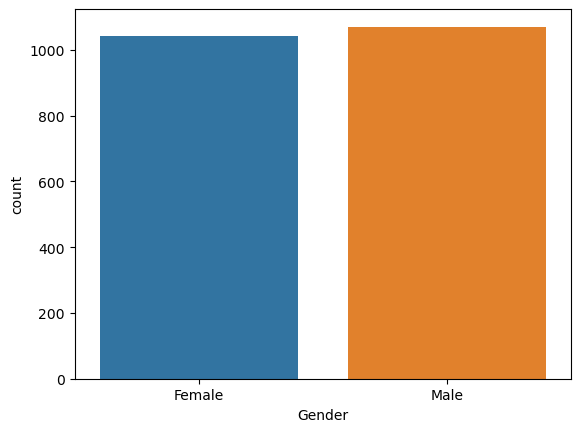

In [22]:
sns.countplot(x='Gender',data=data)

<Axes: xlabel='family_history_with_overweight', ylabel='count'>

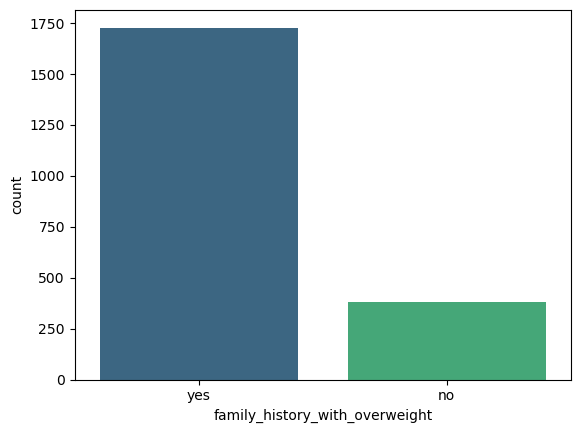

In [23]:
sns.countplot(x='family_history_with_overweight',data=data,palette='viridis')

Text(0.5, 1.0, 'Count Plot of Smoke')

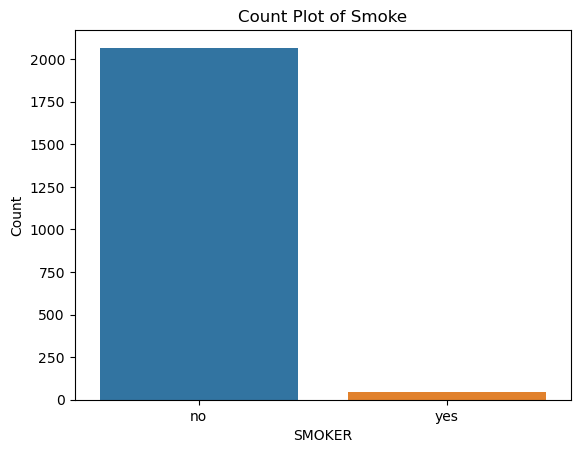

In [24]:
sns.countplot(x='SMOKE', data=data)
plt.xlabel('SMOKER')
plt.ylabel('Count')
plt.title('Count Plot of Smoke')

<Axes: xlabel='MTRANS', ylabel='count'>

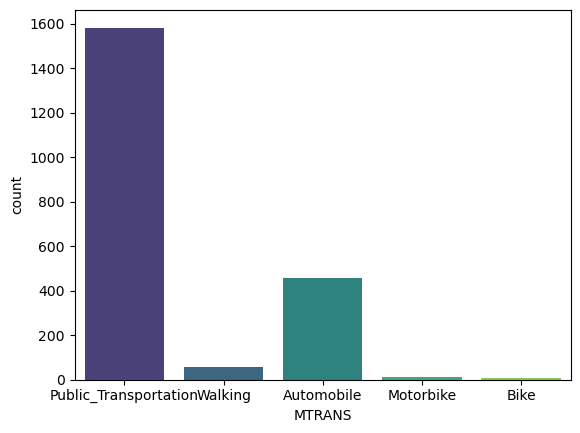

In [25]:
sns.countplot(x='MTRANS',data=data,palette='viridis')

# Encoding 

In [26]:
data = pd.get_dummies(data,columns=["Gender","family_history_with_overweight","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])

In [27]:
data.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2,3,2,0,1,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3,3,3,3,0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2,3,2,2,1,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3,3,2,2,0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2,1,2,0,0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


# Splitting the dataset

In [28]:
X=data.drop(columns=["NObeyesdad"])
y=data['NObeyesdad']

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)

LabelEncoder()

In [30]:
y_encoded = encoder.transform(y)

In [31]:
y_encoded

array([1, 1, 1, ..., 4, 4, 4])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_encoded_train, y_encoded_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [35]:
# Initialize regression models
models = {
          'Random Forest': RandomForestClassifier(random_state=2020),
          'Decision Tree': DecisionTreeClassifier(),                                                 
          'KNN': KNeighborsClassifier(),
          'SVM': SVC()}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_encoded_train.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_encoded_test, y_pred)
    mse = mean_squared_error(y_encoded_test, y_pred)
    rmse = mean_squared_error(y_encoded_test, y_pred, squared=False)
    r2 = r2_score(y_encoded_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R-squared': r2}


In [36]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Select the model with the best performance based on the metrics
best_model_name = results_df.idxmin(axis=1)['RMSE']
best_model = models[best_model_name]
print("Best Model:", best_model_name)

           Random Forest  Decision Tree       KNN       SVM
MAE             0.196217       0.151300  0.645390  0.463357
MSE             0.692671       0.491726  2.442080  1.721040
RMSE            0.832269       0.701232  1.562716  1.311884
R-squared       0.812446       0.866856  0.338758  0.533994
Best Model: Decision Tree


In [37]:
# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_encoded_train)
    accuracy = model.score(X_test, y_encoded_test)  # R-squared score is equivalent to accuracy for regression
    accuracy_scores[name] = accuracy

# Display accuracy scores
accuracy_scores_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
print("Accuracy Scores:")
print(accuracy_scores_df)

Accuracy Scores:
               Accuracy
Random Forest  0.929078
Decision Tree  0.947991
KNN            0.773050
SVM            0.829787


In [38]:
# We get DecisionTreeClassifier as the best model for prediction with an accuracy of 93%